In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from imblearn import under_sampling, over_sampling
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('final_df.csv')

In [3]:
data.head()

,gender,age,body_mass_index,smoker,systolic_blood_pressure,hypertension_treated,family_history_of_cardiovascular_disease,atrial_fibrillation,chronic_kidney_disease,rheumatoid_arthritis,diabetes,chronic_obstructive_pulmonary_disorder,time_to_event_or_censoring,heart_attack_or_stroke_occurred
0,0.0,54.0,25.0,0,161.0,0.0,1,0,0.0,0,0,0,10.0,0.0
1,1.0,31.0,28.2,0,121.0,0.0,0,0,0.0,0,0,0,10.0,0.0
2,1.0,50.0,31.3,0,130.0,0.0,0,0,0.0,0,0,0,10.0,0.0
3,1.0,61.0,30.0,0,165.0,0.0,0,0,0.0,0,0,0,6.0,1.0
4,0.0,67.0,32.6,0,166.0,0.0,0,0,0.0,0,0,0,10.0,0.0


Female = 0.0
Male = 1.0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   gender                                    100000 non-null  float64
 1   age                                       100000 non-null  float64
 2   body_mass_index                           100000 non-null  float64
 3   smoker                                    100000 non-null  int64  
 4   systolic_blood_pressure                   100000 non-null  float64
 5   hypertension_treated                      100000 non-null  float64
 6   family_history_of_cardiovascular_disease  100000 non-null  int64  
 7   atrial_fibrillation                       100000 non-null  int64  
 8   chronic_kidney_disease                    100000 non-null  float64
 9   rheumatoid_arthritis                      100000 non-null  int64  
 10  diabetes             

In [5]:
# List of columns to exclude
exclude_columns = ['age', 'body_mass_index']

# Identify float columns to convert (excluding 'age' and 'body_mass_index')
float_cols_to_convert = [col for col in data.select_dtypes(include='float64').columns 
                         if col not in exclude_columns]

# Convert those columns to integers
data[float_cols_to_convert] = data[float_cols_to_convert].astype(int)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   gender                                    100000 non-null  int32  
 1   age                                       100000 non-null  float64
 2   body_mass_index                           100000 non-null  float64
 3   smoker                                    100000 non-null  int64  
 4   systolic_blood_pressure                   100000 non-null  int32  
 5   hypertension_treated                      100000 non-null  int32  
 6   family_history_of_cardiovascular_disease  100000 non-null  int64  
 7   atrial_fibrillation                       100000 non-null  int64  
 8   chronic_kidney_disease                    100000 non-null  int32  
 9   rheumatoid_arthritis                      100000 non-null  int64  
 10  diabetes             

##### Scaling

In [8]:
scaler  = StandardScaler()
features = ['age','body_mass_index','systolic_blood_pressure','time_to_event_or_censoring']
scaled_data  = data[features]
scaled_data  = scaler.fit_transform(scaled_data)

In [10]:
data[features] = scaled_data

In [11]:
data

,gender,age,body_mass_index,smoker,systolic_blood_pressure,hypertension_treated,family_history_of_cardiovascular_disease,atrial_fibrillation,chronic_kidney_disease,rheumatoid_arthritis,diabetes,chronic_obstructive_pulmonary_disorder,time_to_event_or_censoring,heart_attack_or_stroke_occurred
0,0,0.419189,-0.493092,0,1.833889,0,1,0,0,0,0,0,0.229658,0
1,1,-0.936875,0.304701,0,-0.521721,0,0,0,0,0,0,0,0.229658,0
2,1,0.183352,1.077562,0,0.008291,0,0,0,0,0,0,0,0.229658,0
3,1,0.831904,0.753459,0,2.069450,0,0,0,0,0,0,0,-2.612112,1
4,0,1.185660,1.401665,0,2.128340,0,0,0,0,0,0,0,0.229658,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,-0.229364,0.578942,0,-0.227270,1,0,0,0,0,0,0,0.229658,0
99996,1,-1.408550,-2.188401,0,-0.933953,0,0,0,0,0,0,0,0.229658,0
99997,0,-1.467509,-1.041574,0,0.832755,0,0,0,0,0,0,0,0.229658,0
99998,0,0.831904,0.484204,0,1.833889,0,0,0,0,0,0,0,0.229658,0


##### Target Variable

In [12]:
df_1 = data[:80000].copy()
df_2 = data[80000:].copy()

In [13]:
print(df_1.shape)
print(df_2.shape)

(80000, 14)
(20000, 14)


In [14]:
# X = data.drop(columns=['heart_attack_or_stroke_occurred'])
# y = data['heart_attack_or_stroke_occurred']

##### Over Sample

In [15]:
# Count class
count_class_0, count_class_1 = df_1.heart_attack_or_stroke_occurred.value_counts()

In [16]:
# Divided by class
data_0 = df_1[df_1["heart_attack_or_stroke_occurred"]==0]
data_1 = df_1[df_1['heart_attack_or_stroke_occurred']==1]

In [17]:
print(count_class_0)
print(count_class_1)

74704
5296


In [18]:
print(data_0.shape)
print(data_1.shape)

(74704, 14)
(5296, 14)


In [19]:
df_class_1_over = data_1.sample(count_class_0, replace=True)
df_class_1_over.shape

(74704, 14)

In [20]:
df_over = pd.concat([data_0, df_class_1_over], axis=0)
df_over.shape

(149408, 14)

In [21]:
df_over.heart_attack_or_stroke_occurred.value_counts()

heart_attack_or_stroke_occurred
0    74704
1    74704
Name: count, dtype: int64

##### Spliting Data

In [23]:
X_train = df_over.drop(columns=['heart_attack_or_stroke_occurred'])
y_train = df_over['heart_attack_or_stroke_occurred']

A = df_2.drop(columns=['heart_attack_or_stroke_occurred'])
b = df_2['heart_attack_or_stroke_occurred']
X_valid, X_test, y_valid, y_test = train_test_split(A, b, test_size = 0.5, random_state=42, stratify=b)

In [24]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(f'--'*20)
print(y_train.value_counts())
print(y_valid.value_counts())
print(y_test.value_counts())

(149408, 13)
(10000, 13)
(10000, 13)
----------------------------------------
heart_attack_or_stroke_occurred
0    74704
1    74704
Name: count, dtype: int64
heart_attack_or_stroke_occurred
0    9342
1     658
Name: count, dtype: int64
heart_attack_or_stroke_occurred
0    9342
1     658
Name: count, dtype: int64


In [25]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
               xticklabels=['No', 'Yes'],
               yticklabels=['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.tight_layout()
    plt.show()

### Logistic Regression

In [29]:
# Initizlize Model
log = LogisticRegression(max_iter=1000000)

# Train Model
log.fit(X_train,y_train)

# Predict 
y_train_pred_log = log.predict(X_train)
y_valid_pred_log = log.predict(X_valid)
y_test_pred_log = log.predict(X_test)

In [30]:
#  Evaluation
print("======== Logistic Regression (Train set) ========")
print(classification_report(y_train, y_train_pred_log))
print("Accuracy:", accuracy_score(y_train, y_train_pred_log))

print("\n======== Logistic Regression (Valid set) ========")
print(classification_report(y_valid, y_valid_pred_log))
print("Accuracy:", accuracy_score(y_valid, y_valid_pred_log))

print("\n======== Logistic Regression (Test set) ========")
print(classification_report(y_test, y_test_pred_log))
print("Accuracy:", accuracy_score(y_test, y_test_pred_log))

======== Logistic Regression (Train set) ========
              precision    recall  f1-score   support

           0       0.92      1.00      0.95     74704
           1       0.99      0.91      0.95     74704

    accuracy                           0.95    149408
   macro avg       0.96      0.95      0.95    149408
weighted avg       0.96      0.95      0.95    149408

Accuracy: 0.9515889376740201

======== Logistic Regression (Valid set) ========
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9342
           1       0.94      0.91      0.92       658

    accuracy                           0.99     10000
   macro avg       0.97      0.95      0.96     10000
weighted avg       0.99      0.99      0.99     10000

Accuracy: 0.9901

======== Logistic Regression (Test set) ========
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9342
           1       0.93      0.92      0

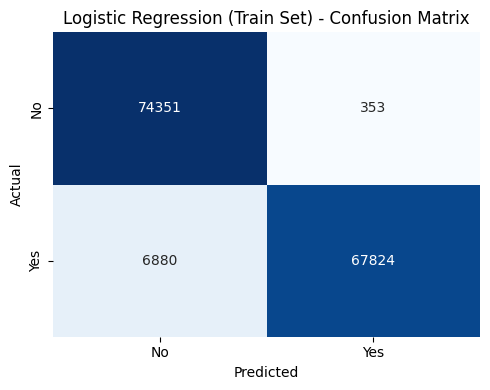

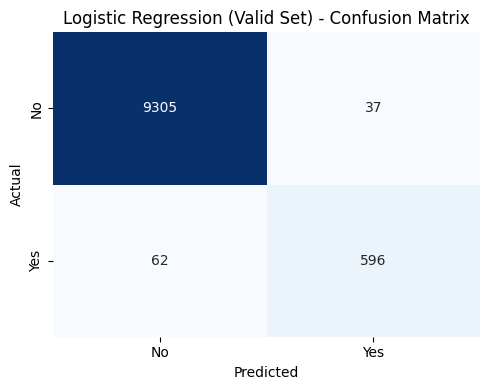

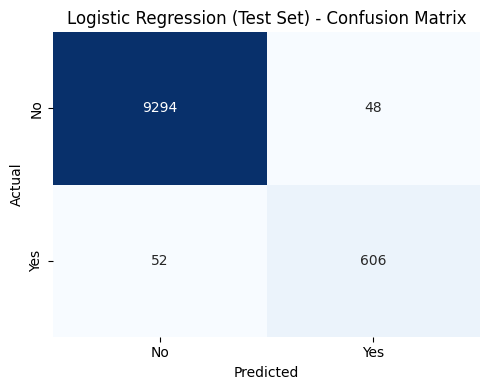

In [31]:
# Calculate confusion matrices
cm_log = confusion_matrix(y_train, y_train_pred_log)
plot_confusion_matrix(cm_log, "Logistic Regression (Train Set) - Confusion Matrix")

cm_log = confusion_matrix(y_valid, y_valid_pred_log)
plot_confusion_matrix(cm_log, "Logistic Regression (Valid Set) - Confusion Matrix")

cm_log = confusion_matrix(y_test, y_test_pred_log)
plot_confusion_matrix(cm_log, "Logistic Regression (Test Set) - Confusion Matrix")


### Decision Tree

In [32]:
# Initialize Model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train Model
decision_tree.fit(X_train, y_train)

# Predict
y_train_pred_tree = decision_tree.predict(X_train)
y_valid_pred_tree = decision_tree.predict(X_valid)
y_test_pred_tree = decision_tree.predict(X_test)

In [33]:
# Evaluation
print("\n======== Decision Tree (Train Set) ========")
print(classification_report(y_train, y_train_pred_tree))
print("Accuracy:", accuracy_score(y_train, y_train_pred_tree))

print("\n======== Decision Tree (Valid Set) ========")
print(classification_report(y_valid, y_valid_pred_tree))
print("Accuracy:", accuracy_score(y_valid, y_valid_pred_tree))

print("\n======== Decision Tree (Test Set) ========")
print(classification_report(y_test, y_test_pred_tree))
print("Accuracy:", accuracy_score(y_test, y_test_pred_tree))


======== Decision Tree (Train Set) ========
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     74704
           1       1.00      1.00      1.00     74704

    accuracy                           1.00    149408
   macro avg       1.00      1.00      1.00    149408
weighted avg       1.00      1.00      1.00    149408

Accuracy: 0.9997188905547226

======== Decision Tree (Valid Set) ========
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9342
           1       0.86      0.85      0.86       658

    accuracy                           0.98     10000
   macro avg       0.93      0.92      0.92     10000
weighted avg       0.98      0.98      0.98     10000

Accuracy: 0.9811

======== Decision Tree (Test Set) ========
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9342
           1       0.87      0.88      0.87       658

  

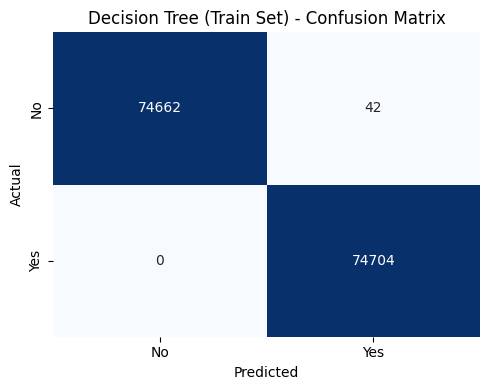

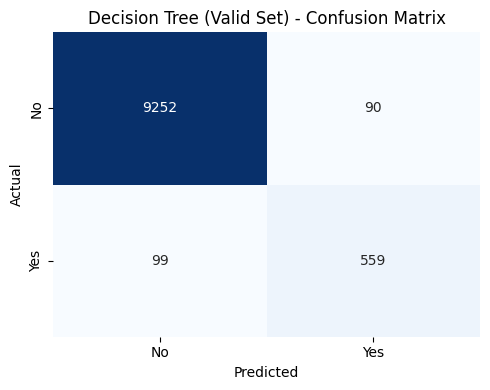

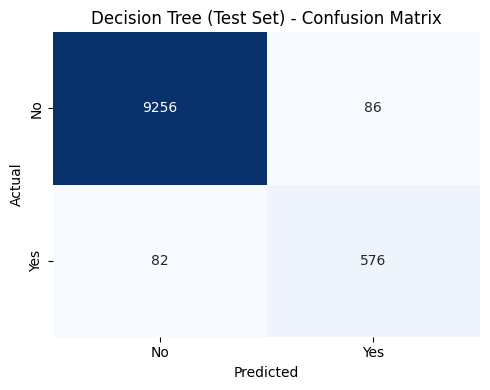

In [34]:
# Calculate confusion matrices
cm_tree = confusion_matrix(y_train, y_train_pred_tree)
plot_confusion_matrix(cm_tree, "Decision Tree (Train Set) - Confusion Matrix")

cm_tree = confusion_matrix(y_valid, y_valid_pred_tree)
plot_confusion_matrix(cm_tree, "Decision Tree (Valid Set) - Confusion Matrix")

cm_tree = confusion_matrix(y_test, y_test_pred_tree)
plot_confusion_matrix(cm_tree, "Decision Tree (Test Set) - Confusion Matrix")


### Random Forest

In [35]:
# Initialize Model
random_forest = RandomForestClassifier(random_state=42)

# Train Model
random_forest.fit(X_train, y_train)

# Predict
y_train_pred_forest = random_forest.predict(X_train)
y_valid_pred_forest = random_forest.predict(X_valid)
y_test_pred_forest = random_forest.predict(X_test)

In [36]:
# Evaluation
print("\n======== Random Forest (Train Set) ========")
print(classification_report(y_train, y_train_pred_forest))
print("Accuracy:", accuracy_score(y_train, y_train_pred_forest))

print("\n======== Random Forest (Valid Set) ========")
print(classification_report(y_valid, y_valid_pred_forest))
print("Accuracy:", accuracy_score(y_valid, y_valid_pred_forest))

print("\n======== Random Forest (Test Set) ========")
print(classification_report(y_test, y_test_pred_forest))
print("Accuracy:", accuracy_score(y_test, y_test_pred_forest))


======== Random Forest (Train Set) ========
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     74704
           1       1.00      1.00      1.00     74704

    accuracy                           1.00    149408
   macro avg       1.00      1.00      1.00    149408
weighted avg       1.00      1.00      1.00    149408

Accuracy: 0.9997188905547226

======== Random Forest (Valid Set) ========
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9342
           1       0.95      0.91      0.93       658

    accuracy                           0.99     10000
   macro avg       0.97      0.95      0.96     10000
weighted avg       0.99      0.99      0.99     10000

Accuracy: 0.9905

======== Random Forest (Test Set) ========
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9342
           1       0.95      0.92      0.94       658

  

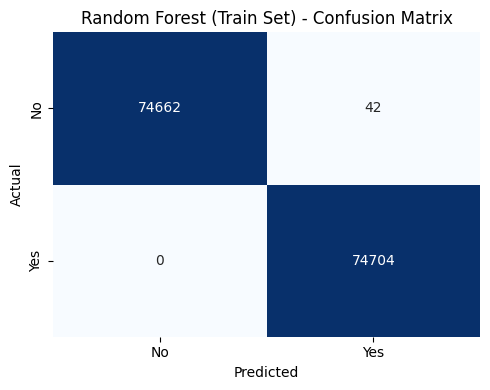

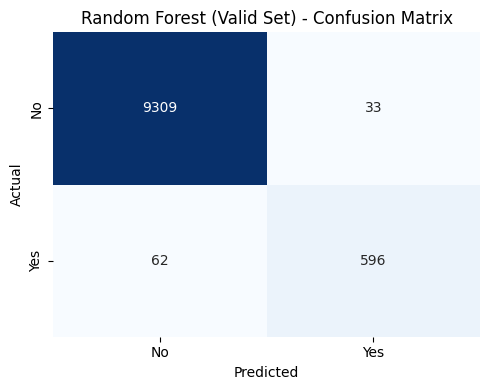

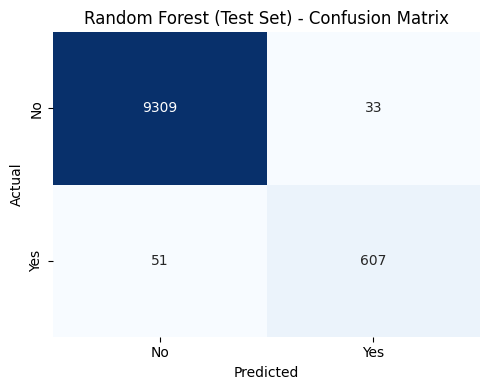

In [37]:
# Calculate confusion matrices
cm_forest = confusion_matrix(y_train, y_train_pred_forest)
plot_confusion_matrix(cm_forest, "Random Forest (Train Set) - Confusion Matrix")

cm_forest = confusion_matrix(y_valid, y_valid_pred_forest)
plot_confusion_matrix(cm_forest, "Random Forest (Valid Set) - Confusion Matrix")

cm_forest = confusion_matrix(y_test, y_test_pred_forest)
plot_confusion_matrix(cm_forest, "Random Forest (Test Set) - Confusion Matrix")


### Neural Network

In [38]:
from tensorflow import keras

In [39]:
# 
model = keras.Sequential([
    keras.layers.Dense(500, input_shape=(13,), activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(2, activation = 'sigmoid')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [40]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5


4669/4669 [==============================] - 16s 3ms/step - loss: 0.1395 - accuracy: 0.9518
Epoch 2/5
4669/4669 [==============================] - 14s 3ms/step - loss: 0.1291 - accuracy: 0.9533
Epoch 3/5
4669/4669 [==============================] - 13s 3ms/step - loss: 0.1213 - accuracy: 0.9552
Epoch 4/5
4669/4669 [==============================] - 13s 3ms/step - loss: 0.1137 - accuracy: 0.9572
Epoch 5/5
4669/4669 [==============================] - 14s 3ms/step - loss: 0.1064 - accuracy: 0.9592


In [41]:
model.evaluate(X_valid, y_valid)

313/313 [==============================] - 1s 2ms/step - loss: 0.0980 - accuracy: 0.9801


[0.09800419956445694, 0.9800999760627747]

In [42]:
y_train_pred_nn = model.predict(X_train)
y_train_pred_nn = [np.argmax(i) for i in y_train_pred_nn]
y_valid_pred_nn = model.predict(X_valid)
y_valid_pred_nn = [np.argmax(i) for i in y_valid_pred_nn]
y_test_pred_nn = model.predict(X_test)
y_test_pred_nn = [np.argmax(i) for i in y_test_pred_nn]

313/313 [==============================] - 1s 2ms/step


In [43]:
# Evaluation
print("\n======== Neural Network (Train Set) ========")
print(classification_report(y_train, y_train_pred_nn))
print("Accuracy:", accuracy_score(y_train, y_train_pred_nn))

print("\n======== Neural Network (Valid Set) ========")
print(classification_report(y_valid, y_valid_pred_nn))
print("Accuracy:", accuracy_score(y_valid, y_valid_pred_nn))

print("\n======== Neural Network (Test Set) ========")
print(classification_report(y_test, y_test_pred_nn))
print("Accuracy:", accuracy_score(y_test, y_test_pred_nn))


======== Neural Network (Train Set) ========
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     74704
           1       0.99      0.93      0.96     74704

    accuracy                           0.96    149408
   macro avg       0.96      0.96      0.96    149408
weighted avg       0.96      0.96      0.96    149408

Accuracy: 0.9608722424502034

======== Neural Network (Valid Set) ========
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9342
           1       0.81      0.91      0.86       658

    accuracy                           0.98     10000
   macro avg       0.90      0.95      0.92     10000
weighted avg       0.98      0.98      0.98     10000

Accuracy: 0.9801

======== Neural Network (Test Set) ========
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9342
           1       0.83      0.92      0.88       658


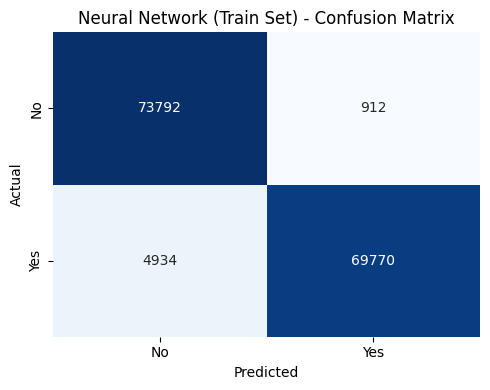

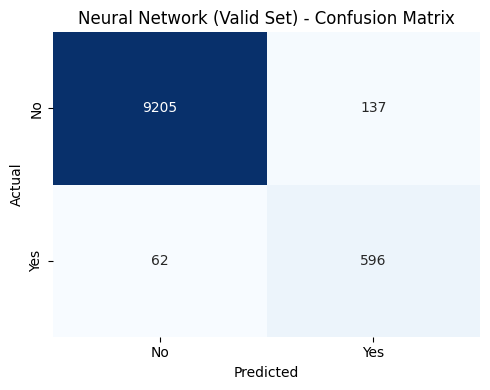

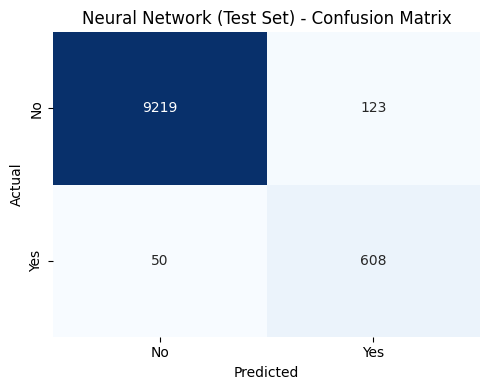

In [44]:
# Calculate confusion matrices
cm_nn = confusion_matrix(y_train, y_train_pred_nn)
plot_confusion_matrix(cm_nn, "Neural Network (Train Set) - Confusion Matrix")

cm_nn = confusion_matrix(y_valid, y_valid_pred_nn)
plot_confusion_matrix(cm_nn, "Neural Network (Valid Set) - Confusion Matrix")

cm_nn = confusion_matrix(y_test, y_test_pred_nn)
plot_confusion_matrix(cm_nn, "Neural Network (Test Set) - Confusion Matrix")


In [45]:
import numpy
import pandas
import matplotlib
import sklearn
import seaborn
import imblearn

print("🔍 Installed Package Versions:\n")
print(f"numpy: {numpy.__version__}")
print(f"pandas: {pandas.__version__}")
print(f"matplotlib: {matplotlib.__version__}")
print(f"scikit-learn: {sklearn.__version__}")
print(f"seaborn: {seaborn.__version__}")
print(f"imblearn: {imblearn.__version__}")


🔍 Installed Package Versions:

numpy: 1.26.4
pandas: 2.2.3
matplotlib: 3.10.3
scikit-learn: 1.4.0
seaborn: 0.13.2
imblearn: 0.13.0


In [47]:
with open("requirements.txt", "w") as f:
    f.write(f"numpy=={numpy.__version__}\n")
    f.write(f"pandas=={pandas.__version__}\n")
    f.write(f"matplotlib=={matplotlib.__version__}\n")
    f.write(f"scikit-learn=={sklearn.__version__}\n")
    f.write(f"seaborn=={seaborn.__version__}\n")
    f.write(f"imblearn=={imblearn.__version__}\n")

print("✅ requirements.txt has been created.")


✅ requirements.txt has been created.


In [49]:
import numpy
import pandas
import matplotlib
import sklearn
import seaborn
import imblearn

# Save clean text with explicit UTF-8 encoding
with open("requirements.txt", "w", encoding="utf-8") as f:
    f.write(f"numpy=={numpy.__version__}\n")
    f.write(f"pandas=={pandas.__version__}\n")
    f.write(f"matplotlib=={matplotlib.__version__}\n")
    f.write(f"scikit-learn=={sklearn.__version__}\n")
    f.write(f"seaborn=={seaborn.__version__}\n")
    f.write(f"imblearn=={imblearn.__version__}\n")

print("✅ requirements.txt saved successfully in UTF-8 format.")


✅ requirements.txt saved successfully in UTF-8 format.


In [50]:
# Display content to verify
with open("requirements.txt", "r", encoding="utf-8") as f:
    print(f.read())


numpy==1.26.4
pandas==2.2.3
matplotlib==3.10.3
scikit-learn==1.4.0
seaborn==0.13.2
imblearn==0.13.0

